<h1><center><font color='navy'>Predictive Analytics and Regression Models<br>Airbnb Listings | San Diego (California)</font></center></h1>

<blockquote><h3><i>The ultimate goal of the project is to predict the Airbnb price listings (July 2021) from San Diego City, using information from the available variables in the database. 
The methodology will follow an exploratory standard analysis and the construction of predictive models evaluated by their performance metrics.</i></h3></blockquote>

## Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.matrix as smatrix
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

## Data Loading 

In [8]:
# Read a CSV File
df = pd.read_csv('listings.csv')

In [9]:
# The Data Framework
df.shape

(9099, 74)

In [10]:
# Finding the Right Data
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5570,https://www.airbnb.com/rooms/5570,20210714194825,2021-07-14,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,While some may compare San Diego’s Mission Bea...,https://a0.muscache.com/pictures/d3342744-140a...,8435,https://www.airbnb.com/users/show/8435,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
1,29967,https://www.airbnb.com/rooms/29967,20210714194825,2021-07-14,"Great home, 10 min walk to Beach","This 2 bedroom, 2 full bathroom home offers al...",NaN,https://a0.muscache.com/pictures/76103867/c9b5...,129123,https://www.airbnb.com/users/show/129123,...,4.92,4.85,4.81,NaN,f,5,5,0,0,0.49


In [11]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099 entries, 0 to 9098
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9099 non-null   int64  
 1   listing_url                                   9099 non-null   object 
 2   scrape_id                                     9099 non-null   int64  
 3   last_scraped                                  9099 non-null   object 
 4   name                                          9099 non-null   object 
 5   description                                   8962 non-null   object 
 6   neighborhood_overview                         6557 non-null   object 
 7   picture_url                                   9099 non-null   object 
 8   host_id                                       9099 non-null   int64  
 9   host_url                                      9099 non-null   o

## Data Cleaning and Preparation

In [87]:
# Dropping values
df_SD=df.drop(['id','listing_url', 'scrape_id', 'last_scraped','description','neighborhood_overview',
         'picture_url','host_id','host_url','host_location','host_about','host_response_time',
         'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_neighbourhood',
         'host_listings_count','host_verifications','neighbourhood','property_type',
         'bathrooms','amenities','maximum_nights','minimum_minimum_nights','maximum_minimum_nights',
         'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
         'maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30',
         'availability_60','availability_90','calendar_last_scraped','number_of_reviews_ltm',
         'number_of_reviews_l30d','first_review','last_review','review_scores_accuracy',
         'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
         'review_scores_value','license','calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','neighbourhood_group_cleansed'], axis=1)

In [88]:
# Removing the ‘$’|‘,’ from Price Column
df_SD['price'] = df_SD['price'].str.replace(',', '',regex=True)
df_SD['price'] = df_SD['price'].str.replace('$','',regex=True)

In [89]:
# Converting DataTypes
df_SD['price'] = df_SD['price'].astype(float)

In [90]:
# Missing Data
missing = df_SD.isna().sum()
missing /= df_SD.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'% Missing Values'})
missing

,% Missing Values
name,0.000000
host_name,0.043961
host_since,0.043961
host_response_rate,7.923948
host_is_superhost,0.043961
host_total_listings_count,0.043961
host_has_profile_pic,0.043961
host_identity_verified,0.043961
neighbourhood_cleansed,0.000000
latitude,0.000000


#### Operating on Null Values

In [138]:
#Handling Missing Data in all the variables that have NaN values 

In [176]:
dfSD=df_SD.dropna()

In [177]:
# Missing Data for dfSD (Check)
missing = dfSD.isna().sum()
missing /= dfSD.shape[0]
missing *=100
missing = missing.to_frame().rename(columns={0:'% Missing Values'})
missing

,% Missing Values
name,0.0
host_name,0.0
host_since,0.0
host_response_rate,0.0
host_is_superhost,0.0
host_total_listings_count,0.0
host_has_profile_pic,0.0
host_identity_verified,0.0
neighbourhood_cleansed,0.0
latitude,0.0


In [178]:
#Training and Testing Data
msk = np.random.rand(len(dfSD)) <= 0.8
train = dfSD[msk]
test = dfSD[~msk]
train.to_csv('df_train.csv', index=False)
test.to_csv('df_test.csv', index=False)

In [5]:
# Importing Dataset
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

## Exploratory Data Analysis

In [6]:
# Data Training (Rows, Columns)
df_train.shape

(5231, 25)

In [11]:
#Descriptive Statistics
df_train.describe()

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month
count,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000,5231.000000
mean,31.327853,32.770793,-117.190713,5.147391,1.956031,2.792200,333.563563,4.959855,183.938826,57.927930,4.749925,4.847584,16.991397,3.123766
std,92.824727,0.061045,0.064331,3.227907,1.186757,2.111025,381.966839,11.577056,114.014528,82.705206,0.372877,0.316876,36.596447,5.985677
min,0.000000,32.533780,-117.281440,1.000000,1.000000,0.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,1.000000,32.736420,-117.251340,2.000000,1.000000,1.000000,124.000000,1.000000,74.000000,7.000000,4.670000,4.830000,1.000000,0.580000
50%,3.000000,32.764030,-117.196000,4.000000,2.000000,2.000000,220.000000,2.000000,177.000000,25.000000,4.850000,4.930000,3.000000,1.710000
75%,16.000000,32.798335,-117.147590,6.000000,3.000000,4.000000,408.000000,3.000000,296.000000,76.000000,4.970000,5.000000,13.000000,3.675000
max,1827.000000,33.101790,-116.936350,16.000000,12.000000,22.000000,10000.000000,365.000000,365.000000,818.000000,5.000000,5.000000,190.000000,117.000000


### Group the data to find which variables seem to be good at explaining the price

In [12]:
# Group by Room Type
df_train.groupby(['room_type']).agg({'price': 'mean','review_scores_rating':'mean','reviews_per_month':'mean'})

,price,review_scores_rating,reviews_per_month
room_type,,,
Entire home/apt,386.080565,4.756379,3.232928
Hotel room,134.166667,4.610000,3.800000
Private room,108.817691,4.728619,2.689655
Shared room,80.754717,4.621509,1.896792


In [13]:
# Group by Instant Bookable
df_train.groupby(['instant_bookable']).agg({'price': 'mean','review_scores_rating': 'mean','reviews_per_month':'mean'})

,price,review_scores_rating,reviews_per_month
instant_bookable,,,
f,320.352582,4.791756,2.635143
t,350.569742,4.696078,3.752759


In [14]:
# Group by Superhost
df_train.groupby(['host_is_superhost']).agg({'price': 'mean','accommodates':'mean','bedrooms':'mean', 'beds':'mean','review_scores_rating': 'mean','reviews_per_month':'mean'})

,price,accommodates,bedrooms,beds,review_scores_rating,reviews_per_month
host_is_superhost,,,,,,
f,341.582232,5.341043,2.004038,2.891336,4.637775,2.417996
t,324.850818,4.936976,1.903869,2.684483,4.871783,3.890626


### Visualizing Data

(0.0, 1000.0)

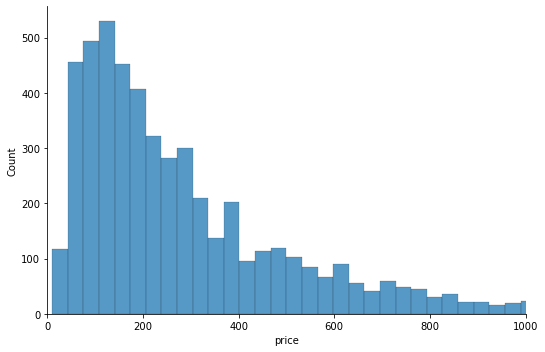

In [15]:
# Distribution of Price
sns.displot(
  df_train,
  x="price",
  aspect=1.5,
)
plt.xlim(0, 1000)

Text(0.5, 1.0, 'Density of prices - room type')

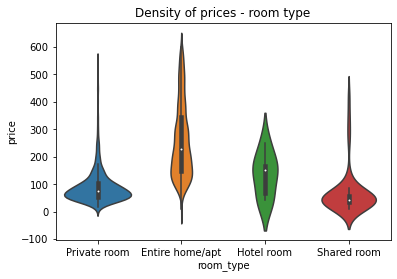

In [18]:
#Density and distribution of prices by room type
df600=df_train[df_train.price < 600]
viz=sns.violinplot(data=df600, x='room_type', y='price')
viz.set_title('Density of prices - room type')

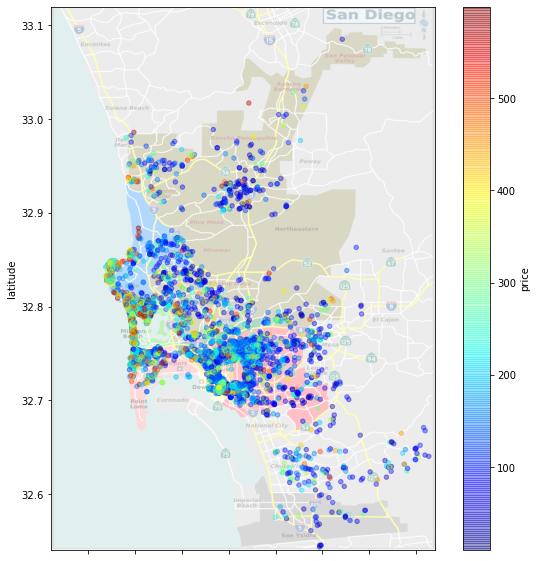

In [22]:
#Price Visualization
import numpy as np
import matplotlib.image as mpimg
california_img=mpimg.imread('San_diego_region.png')
ax = df600.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,10),
                       c="price", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-117.34,-116.93, 32.54,33.12], alpha=0.3)
plt.show()

### Encoding Categorical Values (Room Type)

In [20]:
# Find and Replace for df_train
cleanup_nums = {"room_type":     {"Entire home/apt": 4, "Hotel room": 3,"Private room": 2,"Shared room":1},
                }

In [21]:
dftrain= df_train.replace(cleanup_nums) 

In [22]:
# Find and Replace for df_test useful for Regression Models section
cleanup_nums_df_test = {"room_type":     {"Entire home/apt": 4, "Hotel room": 3,"Private room": 2,"Shared room":1},
                }

In [23]:
dftest= df_test.replace(cleanup_nums_df_test) 

In [24]:
# Modified Dataset  
dftrain.to_csv('dftrain.csv', index=False)
dftest.to_csv('dftest.csv', index=False)

In [25]:
dftrain = pd.read_csv('dftrain.csv')
dftest = pd.read_csv('dftest.csv')

### Scatter Plots 

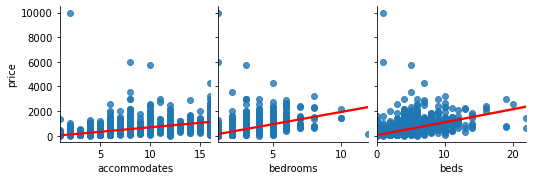

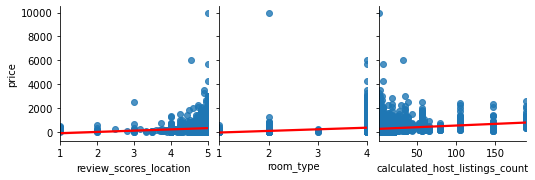

In [26]:
sns.pairplot(dftrain,x_vars=['accommodates','bedrooms','beds'],y_vars=['price'],kind='reg',plot_kws={'line_kws':{'color':'red'}})
sns.pairplot(dftrain,x_vars=['review_scores_location','room_type','calculated_host_listings_count'],y_vars=['price'],kind='reg',plot_kws={'line_kws':{'color':'red'}})

### Correlation Matrix

In [27]:
#Correlation Pearson 'Default'
dftrain.corr()

,host_total_listings_count,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month
host_total_listings_count,1.000000,0.064070,-0.158572,0.133908,0.149539,0.133831,0.134744,0.128218,-0.068090,0.097294,-0.137352,-0.122511,-0.024212,0.625182,-0.066718
latitude,0.064070,1.000000,-0.434009,-0.059086,0.015132,0.091719,0.044395,0.115390,0.031524,0.041981,-0.083415,0.034949,0.099352,0.071037,-0.072133
longitude,-0.158572,-0.434009,1.000000,-0.227047,-0.204721,-0.198624,-0.206596,-0.311167,0.067838,-0.087748,0.030793,0.012697,-0.181366,-0.285317,0.062811
room_type,0.133908,-0.059086,-0.227047,1.000000,0.448663,0.356317,0.353522,0.283903,-0.000431,0.023682,0.003176,0.038575,0.095516,0.168995,0.039387
accommodates,0.149539,0.015132,-0.204721,0.448663,1.000000,0.845026,0.852040,0.614798,-0.113276,0.083271,-0.135153,-0.044649,0.025911,0.238870,-0.029231
bedrooms,0.133831,0.091719,-0.198624,0.356317,0.845026,1.000000,0.814741,0.616608,-0.051412,0.075452,-0.171180,-0.008256,0.050242,0.235423,-0.078566
beds,0.134744,0.044395,-0.206596,0.353522,0.852040,0.814741,1.000000,0.584988,-0.083960,0.084521,-0.129533,-0.031804,0.034030,0.234669,-0.045794
price,0.128218,0.115390,-0.311167,0.283903,0.614798,0.616608,0.584988,1.000000,-0.080551,0.115712,-0.155717,0.026556,0.087972,0.267426,-0.064276
minimum_nights,-0.068090,0.031524,0.067838,-0.000431,-0.113276,-0.051412,-0.083960,-0.080551,1.000000,0.037854,-0.107536,0.004840,0.004253,-0.085042,-0.103131
availability_365,0.097294,0.041981,-0.087748,0.023682,0.083271,0.075452,0.084521,0.115712,0.037854,1.000000,-0.074635,-0.107434,-0.047761,0.189818,-0.062971


In [28]:
#Correlation Spearman
dftrain.corr(method ='spearman')

,host_total_listings_count,latitude,longitude,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_location,calculated_host_listings_count,reviews_per_month
host_total_listings_count,1.000000,0.025787,-0.250950,0.175713,0.266972,0.175207,0.236410,0.308834,-0.153903,0.187109,-0.052326,-0.288032,-0.077229,0.853760,-0.127711
latitude,0.025787,1.000000,-0.531483,-0.031406,0.062996,0.126925,0.100094,0.186226,0.106466,0.036061,-0.086132,0.056019,0.188025,0.025076,-0.160980
longitude,-0.250950,-0.531483,1.000000,-0.230557,-0.275196,-0.249955,-0.280354,-0.496907,-0.084660,-0.083352,0.026660,0.050854,-0.279611,-0.267108,0.134131
room_type,0.175713,-0.031406,-0.230557,1.000000,0.562560,0.440246,0.475442,0.572043,0.159387,0.013701,0.061861,-0.028962,0.070350,0.154429,0.115316
accommodates,0.266972,0.062996,-0.275196,0.562560,1.000000,0.851297,0.869062,0.793790,0.056547,0.073014,-0.063501,-0.085629,0.048863,0.257677,-0.022961
bedrooms,0.175207,0.126925,-0.249955,0.440246,0.851297,1.000000,0.830569,0.748522,0.142772,0.068143,-0.138034,-0.010628,0.086612,0.154006,-0.129116
beds,0.236410,0.100094,-0.280354,0.475442,0.869062,0.830569,1.000000,0.731090,0.077005,0.085481,-0.084423,-0.064182,0.062288,0.231915,-0.063615
price,0.308834,0.186226,-0.496907,0.572043,0.793790,0.748522,0.731090,1.000000,0.064897,0.131038,-0.125025,-0.002368,0.186560,0.304323,-0.092172
minimum_nights,-0.153903,0.106466,-0.084660,0.159387,0.056547,0.142772,0.077005,0.064897,1.000000,-0.030819,-0.168528,0.137884,0.147997,-0.183142,-0.314407
availability_365,0.187109,0.036061,-0.083352,0.013701,0.073014,0.068143,0.085481,0.131038,-0.030819,1.000000,-0.093214,-0.117399,-0.021294,0.216502,-0.105768


### Heatmap

<AxesSubplot:>

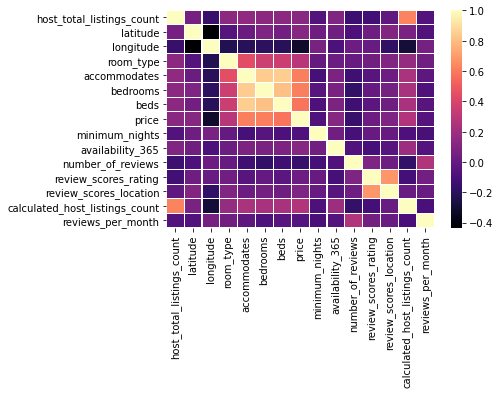

In [29]:
# Heatmap Correlation Pearson 'Default'
sns.heatmap(dftrain.corr(),cmap="magma",linewidths=.1)

<AxesSubplot:>

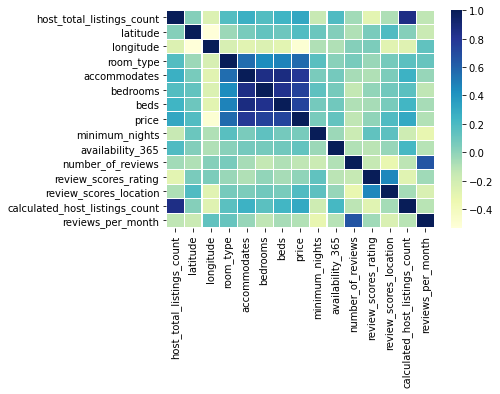

In [30]:
# Heatmap Correlation Spearman
sns.heatmap(dftrain.corr(method ='spearman'),cmap="YlGnBu",linewidths=.1)

<blockquote>Based on the previous results, the variables <b>accommodates</b>, <b>bedrooms</b>, and <b>beds</b> could be explanatory for the price.</blockquote>

## Model Performance Metrics

### Univariate linear regression model

#### Bedrooms (Variable)

In [31]:
#Univariate linear regression for 'bedrooms'
linear_univ_mod_1 = LinearRegression().fit(dftrain[['bedrooms']], dftrain[['price']])

In [33]:
dftest[['predicted_linear_univ_1']] = pd.DataFrame(linear_univ_mod_1.predict(dftest[['bedrooms']]))

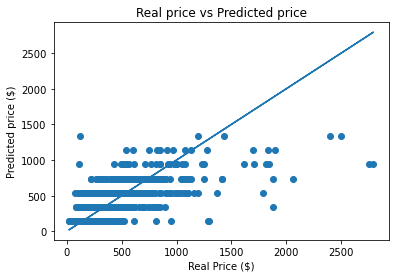

In [34]:
plt.scatter(dftest[['price']], dftest[['predicted_linear_univ_1']])
plt.plot(dftest[['price']], dftest[['price']])
plt.title("Real price vs Predicted price")
plt.xlabel("Real Price ($)")
plt.ylabel("Predicted price ($)")
plt.show()

In [35]:
#Model Performance Metrics for predicted_linear_univ_1
RMSE_uni = mean_squared_error(dftest[['price']], dftest[['predicted_linear_univ_1']], squared=False)
MAE_uni = mean_absolute_error(dftest[['price']], dftest[['predicted_linear_univ_1']])
MAPE_uni = mean_absolute_percentage_error(dftest[['price']], dftest[['predicted_linear_univ_1']])
print("RMSE = {}".format(round(RMSE_uni, 2)))
print("MAE = {}".format(round(MAE_uni, 2)))
print("MAPE = {}".format(round(MAPE_uni, 2)))

RMSE = 220.74
MAE = 138.07
MAPE = 0.65


#### Accommodates (Variable)

In [36]:
#Univariate linear regression for 'accommodates'
linear_univ_mod = LinearRegression().fit(dftrain[['accommodates']], dftrain[['price']])

In [37]:
dftest[['predicted_linear_univ']] = pd.DataFrame(linear_univ_mod.predict(dftest[['accommodates']]))

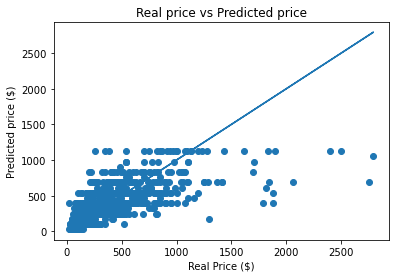

In [38]:
plt.scatter(dftest[['price']], dftest[['predicted_linear_univ']])
plt.plot(dftest[['price']], dftest[['price']])
plt.title("Real price vs Predicted price")
plt.xlabel("Real Price ($)")
plt.ylabel("Predicted price ($)")
plt.show()

In [39]:
#Model Performance Metrics for predicted_linear_univ
RMSE_uni = mean_squared_error(dftest[['price']], dftest[['predicted_linear_univ']], squared=False)
MAE_uni = mean_absolute_error(dftest[['price']], dftest[['predicted_linear_univ']])
MAPE_uni = mean_absolute_percentage_error(dftest[['price']], dftest[['predicted_linear_univ']])
print("RMSE = {}".format(round(RMSE_uni, 2)))
print("MAE = {}".format(round(MAE_uni, 2)))
print("MAPE = {}".format(round(MAPE_uni, 2)))

RMSE = 223.58
MAE = 137.2
MAPE = 0.57


### Linear regression with quadratic term

#### Accommodates Variable

In [53]:
dftrain[['accommodates_sq']] = dftrain[['accommodates']]*dftrain[['accommodates']]
linear_univ_mod_quad = LinearRegression().fit(dftrain[['accommodates', 'accommodates_sq']], dftrain[['price']])

In [54]:
dftest[['accommodates_sq']] = dftest[['accommodates']]*dftest[['accommodates']]
dftest[['predicted_linear_univ_sq']] = pd.DataFrame(linear_univ_mod_quad.predict(dftest[['accommodates', 'accommodates_sq']]))

In [55]:
RMSE_uni_sq = mean_squared_error(dftest[['price']], dftest[['predicted_linear_univ_sq']], squared=False)
MAE_uni_sq = mean_absolute_error(dftest[['price']], dftest[['predicted_linear_univ_sq']])
MAPE_uni_sq = mean_absolute_percentage_error(dftest[['price']], dftest[['predicted_linear_univ_sq']])
print("RMSE = {}".format(round(RMSE_uni_sq, 2)))
print("MAE = {}".format(round(MAE_uni_sq, 2)))
print("MAPE = {}".format(round(MAPE_uni_sq, 2)))

RMSE = 223.37
MAE = 136.61
MAPE = 0.57


### Multivariate linear regression

In [43]:
columns = ['bedrooms', 'beds', 'calculated_host_listings_count', 'room_type', 'review_scores_location', 'accommodates']

In [44]:
linear_multi_mod = LinearRegression().fit(dftrain[columns], dftrain[['price']])

In [45]:
dftest[['predicted_linear_multi']] = pd.DataFrame(linear_multi_mod.predict(dftest[columns]))

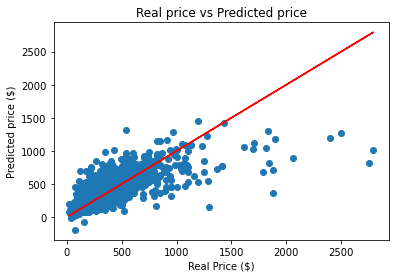

In [47]:
plt.scatter(dftest[['price']], dftest[['predicted_linear_multi']])
plt.plot(dftest[['price']], dftest[['price']], color = 'red')
plt.title("Real price vs Predicted price")
plt.xlabel("Real Price ($)")
plt.ylabel("Predicted price ($)")
plt.show()

In [48]:
RMSE_multi = mean_squared_error(dftest[['price']], dftest[['predicted_linear_multi']], squared=False)
MAE_multi = mean_absolute_error(dftest[['price']], dftest[['predicted_linear_multi']])
MAPE_multi = mean_absolute_percentage_error(dftest[['price']], dftest[['predicted_linear_multi']])
print("RMSE = {}".format(round(RMSE_multi, 2)))
print("MAE = {}".format(round(MAE_multi, 2)))
print("MAPE = {}".format(round(MAPE_multi, 2)))

RMSE = 203.16
MAE = 120.21
MAPE = 0.5


### Random forests

In [49]:
mod_random_for = RandomForestRegressor().fit(dftrain[columns], dftrain[['price']].values.ravel())

In [50]:
dftest[['predicted_random_for']] = pd.DataFrame(mod_random_for.predict(dftest[columns]))

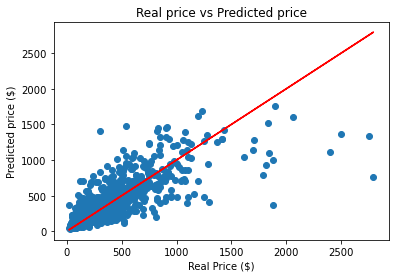

In [51]:
plt.scatter(dftest[['price']], dftest[['predicted_random_for']])
plt.plot(dftest[['price']], dftest[['price']], color = 'red')
plt.title("Real price vs Predicted price")
plt.xlabel("Real Price ($)")
plt.ylabel("Predicted price ($)")
plt.show()

In [52]:
RMSE_random = mean_squared_error(dftest[['price']], dftest[['predicted_random_for']], squared=False)
MAE_random = mean_absolute_error(dftest[['price']], dftest[['predicted_random_for']])
MAPE_random = mean_absolute_percentage_error(dftest[['price']], dftest[['predicted_random_for']])
print("RMSE = {}".format(round(RMSE_random, 2)))
print("MAE = {}".format(round(MAE_random, 2)))
print("MAPE = {}".format(round(MAPE_random, 2)))

RMSE = 193.35
MAE = 111.27
MAPE = 0.46


#### Feature Importance

In [56]:
# Feature Importance
feature_importance_rf = pd.DataFrame({'variable':columns, 'FI': mod_random_for.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
0,bedrooms,0.363280
5,accommodates,0.217285
2,calculated_host_listings_count,0.159775
4,review_scores_location,0.152479
1,beds,0.098257
3,room_type,0.008924


## Random forests - different parameters

In [57]:
mod_random_for_param = RandomForestRegressor(n_estimators = 350).fit(dftrain[columns], dftrain[['price']].values.ravel())

In [58]:
dftest[['predicted_random_for_param']] = pd.DataFrame(mod_random_for_param.predict(dftest[columns]))

In [63]:
RMSE_fi = mean_squared_error(dftest[['price']], dftest[['predicted_random_for_param']], squared=False)
MAE_fi = mean_absolute_error(dftest[['price']], dftest[['predicted_random_for_param']])
MAPEfi = mean_absolute_percentage_error(dftest[['price']], dftest[['predicted_random_for_param']])
print("RMSE = {}".format(round(RMSE_fi, 2)))
print("MAE = {}".format(round(MAE_fi, 2)))
print("MAPE = {}".format(round(MAPEfi, 2)))

RMSE = 194.82
MAE = 111.71
MAPE = 0.46


In [60]:
feature_importance_rf = pd.DataFrame({'variable':columns, 'FI': mod_random_for_param.feature_importances_})
feature_importance_rf.sort_values('FI', ascending = False)

,variable,FI
0,bedrooms,0.377919
5,accommodates,0.203867
2,calculated_host_listings_count,0.160346
4,review_scores_location,0.152732
1,beds,0.095690
3,room_type,0.009446


## Final Thoughts

<blockquote>In this predictive analytics project in Python, I built different models to predict the listing price in San Diego and then choose the best of all the models.
The variables <b>accommodates</b>, <b>bedrooms</b>, and <b>beds</b> according to the first exploratory analysis with scatter plots and heat maps suggest a greater predictive force for price.
From the data sets, I trained different prediction models:<b> univariate linear regression</b>,<b> multivariate linear regression</b>, and<b> Random Forest</b>.
</blockquote>

#### Metric comparison table between models

In [83]:
table=[['RMSE',RMSE_uni,RMSE_uni_sq,RMSE_multi,RMSE_random,RMSE_fi],['MAE',MAE_uni, MAE_uni_sq,MAE_multi,MAE_random,MAE_fi],['MAPE',MAPE_uni,MAPE_uni_sq,MAPE_multi,MAPE_random,MAPEfi]]
pd.DataFrame(table, columns=['METRIC','UNIV','UNIV_SQ','MULTI','RANDOM', 'FI'])

,METRIC,UNIV,UNIV_SQ,MULTI,RANDOM,FI
0,RMSE,223.584864,223.374941,203.164485,193.348686,194.824631
1,MAE,137.198999,136.607250,120.209603,111.266443,111.708953
2,MAPE,0.567900,0.566625,0.495705,0.456267,0.457859


<blockquote>As can be seen in the table above, the <b>RANDOM FOREST</b> model for all variables is the most suitable for predicting the listing price. With an average error of <b>+- 111.26 dollars </b> and with an average percentage error of <b>+- 45% </b>. This model stands out with the smallest metrics compared to the other models.</blockquote>